In [1]:
!pip install pycuda

In [33]:
!nvcc --version
#checks for the current version of cuda in the device

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [2]:
pip install tensorflow


In [9]:
# Check if GPU is available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Check if CUDA is available
    for gpu in gpus:
        print(f"GPU device name: {gpu.name}")
        print(f"CUDA available: {tf.test.is_built_with_cuda()}")
else:
    print("No GPU available.")

GPU device name: /physical_device:GPU:0
CUDA available: True


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import time

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Function to create and train CNN model and measure time
def train_cnn_model(device):
    with tf.device(device):
        tf.keras.backend.clear_session()  # Reset TensorFlow session
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10)
        ])

        model.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

        start_time = time.time()
        model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
        end_time = time.time()
        return end_time - start_time

# Train on CPU
cpu_time = train_cnn_model('/CPU:0')

# Train on GPU
gpu_time = train_cnn_model('/GPU:0')

# Display results
print(f"Training time on CPU: {cpu_time} seconds")
print(f"Training time on GPU: {gpu_time} seconds")
print(f"Speedup: {cpu_time / gpu_time:.2f} times")


Epoch 1/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.5177 - accuracy: 0.4461 - val_loss: 1.2325 - val_accuracy: 0.5560
Epoch 2/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1560 - accuracy: 0.5913 - val_loss: 1.0777 - val_accuracy: 0.6164
Epoch 3/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0112 - accuracy: 0.6423 - val_loss: 0.9774 - val_accuracy: 0.6552
Epoch 4/5
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9190 - accuracy: 0.6745 - val_loss: 0.9687 - val_accuracy: 0.6556
Epoch 5/5
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8449 - accuracy: 0.7039 - val_loss: 0.8891 - val_accuracy: 0.6944
Epoch 1/5
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5267 - accuracy: 0.4430 - val_loss: 1.2787 - val_accuracy: 0.5337
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1736 - accuracy: 0.5831 - val_loss: 1.0836 - val_accur

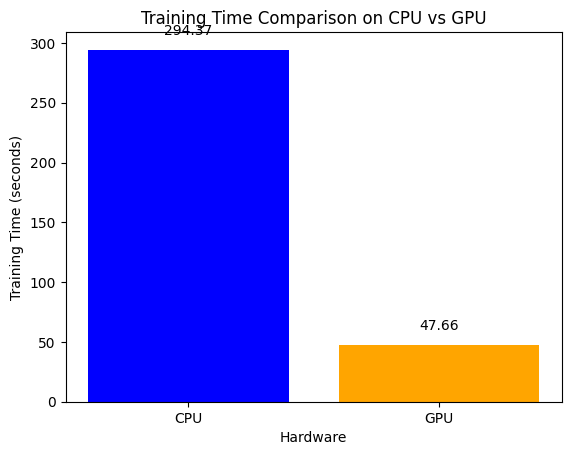

In [7]:
import matplotlib.pyplot as plt

# Training times
cpu_time = 294.37062335014343
gpu_time = 47.66080045700073

# Labels and values for the bar chart
labels = ['CPU', 'GPU']
times = [cpu_time, gpu_time]

# Create a bar chart
plt.bar(labels, times, color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Hardware')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison on CPU vs GPU')

# Display the values on top of the bars
for i, value in enumerate(times):
    plt.text(i, value + 10, f'{value:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()
